In [1]:
def closest_to_data(arr1, arr2, vals1, vals2):
    # Gets DPCA & CCGP arrays, and min,max DPCA & CCGP values with vals_i = [min_i, max_i]. Finds beta idxs for closest matches
    
    idxs1_1 = np.where(abs(arr1-vals1[0]) == np.min(abs(arr1-vals1[0])))[0][0]
    idxs1_2 = np.where(abs(arr1-vals1[1]) == np.min(abs(arr1-vals1[1])))[0][0]
    idxs2_1 = np.where(abs(arr2-vals2[0]) == np.min(abs(arr2-vals2[0])))[0][0]
    idxs2_2 = np.where(abs(arr2-vals2[1]) == np.min(abs(arr2-vals2[1])))[0][0]
    idxs1 = np.array([idxs1_1, idxs1_2])
    idxs2 = np.array([idxs2_1, idxs2_2])
    
    return idxs1, idxs2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
from scipy import stats

with open('RT_sim_results.pkl', 'rb') as results_file:
# with open('results_LRO_Feb-18-2024_22:47:10.pkl', 'rb') as results_file:
    [details, DPCAs, CCGPs] = pickle.load(results_file)
    
alphas = details['alphas']
ratios = details['ratios']
gs = details['gs']
n_nets = details['n_nets']
n_alphas = len(alphas)
n_ratios = len(ratios)
n_gs = len(gs)

### Print out sim data parameter ranges etc
# print('runtime for this batch was ', np.round(details['runtime_sec']/(3600), 3), ' hours')
# for k, v in details.items():
#     print(k,':', v)


In [3]:
### Averaging DPCA, CCGP measures per alpha, g, ratio, with optional multiple alpha and g values. Done manually for clarity 

alphas = details['alphas']
ratios = details['ratios']
gs = details['gs']
n_nets = details['n_nets']
n_alphas = len(alphas)
n_ratios = len(ratios)
n_gs = len(gs)

DPCA_means = np.zeros([n_gs, n_alphas, n_ratios])
CCGP_means = np.zeros([n_gs, n_alphas, n_ratios])
for aind in range(n_alphas):
    for gind in range(n_gs):
        y = np.squeeze(np.mean(DPCAs[gind,aind,:,:], axis = 1)) # Get array of len n_betas of mean DPCA for the aind-th alpha, gind-th g
        DPCA_means[gind, aind,:] = y
    
for aind in range(n_alphas):
    for gind in range(n_gs):
        y = np.squeeze(np.mean(CCGPs[gind,aind,:,:], axis = 1)) # Get array of len n_betas of mean DPCA for the aind-th alpha, gind-th g
        CCGP_means[gind, aind,:] = y


In [4]:
### Singling out relevant values in DPCA, CCGP - i.e. range of simulation values close to monkey data,
### shared by both measures, for optional plotting 

### Monkey data values, w&w/o HFS
DATA_DPCAs = np.array([5.5, 5.0])
DATA_CCGPs = np.array([0.75, 0.83])
DATA = np.array([DATA_DPCAs, DATA_CCGPs])

cond_DPCA = (DPCA_means >= 4.7) & (DPCA_means <= 5.8)
cond_CCGP = (CCGP_means >= 0.71) & (CCGP_means <= 0.86)
relevant_idxs = np.where(cond_DPCA & cond_CCGP)
relevant_DPCA_vals = DPCA_means[relevant_idxs]
relevant_CCGP_vals = CCGP_means[relevant_idxs]
relevant_DPCA = np.full_like(DPCA_means, np.nan, dtype=float)
relevant_DPCA[relevant_idxs] = relevant_DPCA_vals
relevant_CCGP = np.full_like(CCGP_means, np.nan, dtype=float)
relevant_CCGP[relevant_idxs] = relevant_CCGP_vals


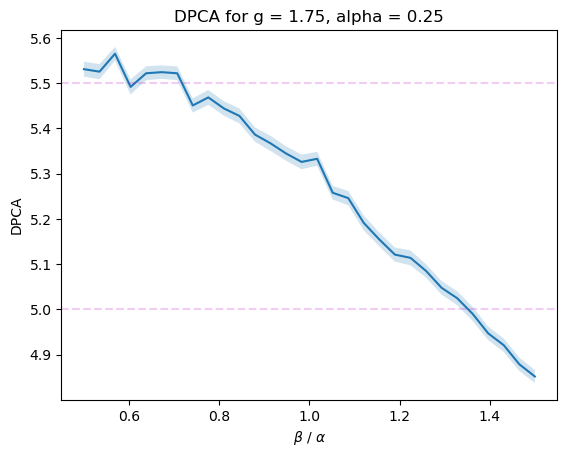

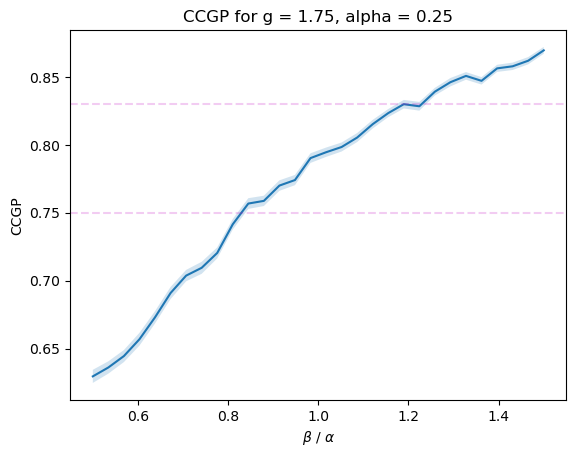

In [5]:
### Plot
### Optional additions to plot and savefig commented out 

p_gind = 0
p_aind = 0
nice_g = np.round(gs[p_gind], 3)
nice_a = np.round(alphas[p_aind], 3)
xlabel = r'$\beta$ / $\alpha$'

### location for vertical bar is according to first/last non-Nan cells in the relevant_measures arrays
loc1 = np.where(relevant_DPCA[p_gind,p_aind,:] == (relevant_DPCA[p_gind,p_aind,:][~np.isnan(relevant_DPCA[p_gind,p_aind,:])][0]))[0][0]
loc2 = np.where(relevant_DPCA[p_gind,p_aind,:] == (relevant_DPCA[p_gind,p_aind,:][~np.isnan(relevant_DPCA[p_gind,p_aind,:])][-1]))[0][0]
beta1 = ratios[loc1]
beta2 = ratios[loc2]
idxs1, idxs2 = closest_to_data(DPCA_means[p_gind,p_aind,:], CCGP_means[p_gind,p_aind,:], DATA_DPCAs, DATA_CCGPs)

### DPCA plot
plt.figure()
x = ratios
y = DPCA_means[p_gind,p_aind,:]
DPCA_se_per_ag = stats.sem(DPCAs[p_gind,p_aind,:,:], axis = 1) 
DPCA_std_per_ag = np.std(DPCAs[p_gind,p_aind,:,:], axis = 1) 
shade = np.squeeze(DPCA_se_per_ag)
plt.plot(x, y)
plt.fill_between(x, y-shade,  y+shade, alpha = 0.2)

### Vertical lines and printed values delimiting relevant range, shade whole range
# plt.text(beta1, y[loc1], str(np.round(y[loc1], 2)))
# plt.text(beta2, y[loc2], str(np.round(y[loc2], 2)))
# plt.axvspan(xmin = beta1, xmax = beta2, alpha = 0.1, color = 'g')
# plt.axvline(x[idxs1[0]], ls = '--', c = 'g', alpha = 0.5)
# plt.axvline(x[idxs1[1]], ls = '--', c = 'g', alpha = 0.5)

### horizontal markers of monkey data values
plt.axhline(DATA_DPCAs[0], ls = '--', c = 'm', alpha = 0.2)
plt.axhline(DATA_DPCAs[1], ls = '--', c = 'm', alpha = 0.2)

plt.xlabel(xlabel)
plt.ylabel('DPCA')
plt.title('DPCA for g = '+ str(nice_g)+', alpha = ' + str(nice_a))
# plt.savefig('DPCA_g175_a25_SE.svg', dpi='figure', format='svg')
plt.show()

### CCGP plot
plt.figure()
x = ratios
y = CCGP_means[p_gind,p_aind,:]
CCGP_se_per_ag = stats.sem(CCGPs[p_gind,p_aind,:,:], axis = 1) 
CCGP_std_per_ag = np.std(CCGPs[p_gind,p_aind,:,:], axis = 1) 
shade = np.squeeze(CCGP_se_per_ag)
plt.plot(x, y)
plt.fill_between(x, y-shade,  y+shade, alpha = 0.2)

### Printed values delimiting relevant range, shade whole range; Vertical lines for closest value to data 
# plt.text(beta1, y[loc1], str(np.round(y[loc1], 2)))
# plt.text(beta2, y[loc2], str(np.round(y[loc2], 2)))
# plt.axvspan(xmin = beta1, xmax = beta2, alpha = 0.1, color = 'g')
# plt.axvline(x[idxs2[0]], ls = '--', c = 'g', alpha = 0.5)
# plt.axvline(x[idxs2[1]], ls = '--', c = 'g', alpha = 0.5)

### horizontal markers of monkey data values
plt.axhline(DATA_CCGPs[0], ls = '--', c = 'm', alpha = 0.2)
plt.axhline(DATA_CCGPs[1], ls = '--', c = 'm', alpha = 0.2)

plt.xlabel(xlabel)
plt.ylabel('CCGP')
plt.title('CCGP for g = '+ str(nice_g)+', alpha = ' + str(nice_a))
# plt.savefig('CCGP_g175_a25_SE.svg', dpi='figure', format='svg')
plt.show()
